In [ ]:
author_year = "lee24"
dataset_id = "GSE244515"
url = "https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE244515"
title = "Uncovering systemic immunological modification by type 2 diabetes mellitus in periodontitis patients via single-cell RNA analysis"

In [8]:
import os
import logging
import warnings
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [ ]:
import tarfile
import os

# Path to the .tar file you downloaded
tar_file = "GSE244515_RAW.tar"

# Directory where you want to extract the contents
extract_dir = "GSE244515_RAW"

# Open the tar file and extract its contents
with tarfile.open(tar_file, "r") as tar:
    # Check if the extraction directory exists, if not, create it
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)
    
    # Extract all files to the specified directory
    tar.extractall(path=extract_dir)

# Remove the .tar file after extraction
if os.path.exists(tar_file):
    os.remove(tar_file)
    print(f"Removed {tar_file}")

print(f"Extracted all files to {extract_dir} and removed the .tar file!")

In [9]:
#Q: Why are we making another file directory instead of using extract_dir?
data_dir = "GSE244515_RAW"

# Function to load data for each sample
def load_sample(prefix):
    return sc.read_10x_mtx(
        data_dir, 
        #Q: wouldn't you need to know the contents of your data to know gene_symbols exists? How can I view this in my data? 
        var_names='gene_symbols',  # Use gene symbols as var names
        prefix=prefix,  # Prefix for the files
        cache=False
    )

# Get a list of all files in the directory
all_files = os.listdir(data_dir)

#Q: Go over the different peices of this syntax?
# Get the unique prefixes by identifying unique parts of the filenames before '_matrix.mtx.gz'
prefixes = sorted(set(f.split('matrix.mtx.gz')[0] for f in all_files if 'matrix.mtx.gz' in f))

# List to store the loaded AnnData objects
adatas = []

# Loop over prefixes and load the corresponding sample data
for prefix in prefixes:
    adata = load_sample(prefix)
    adatas.append(adata)
    print(f"Loaded {prefix}")

Loaded GSM7818495_H1_
Loaded GSM7818496_H2_
Loaded GSM7818497_H3_
Loaded GSM7818498_H4_
Loaded GSM7818499_H5_
Loaded GSM7818500_H6_
Loaded GSM7818501_H7_
Loaded GSM7818502_H8_
Loaded GSM7818503_H9_
Loaded GSM7818504_H10_
Loaded GSM7818505_H11_
Loaded GSM7818506_PD1_
Loaded GSM7818507_PD2_
Loaded GSM7818508_PD3_
Loaded GSM7818509_PD4_
Loaded GSM7818510_PD5_
Loaded GSM7818511_PD6_
Loaded GSM7818512_PD7_
Loaded GSM7818513_PD8_
Loaded GSM7818514_PD9_
Loaded GSM7818515_PD10_
Loaded GSM7818516_PDDM1_
Loaded GSM7818517_PDDM2_
Loaded GSM7818518_PDDM3_
Loaded GSM7818519_PDDM4_
Loaded GSM7818520_PDDM5_
Loaded GSM7818521_PDDM6_


In [10]:
#Assigns a sample identifier to each cell in each AnnData object
for prefix, adata in zip(prefixes, adatas):
    adata.obs['sample_id'] = prefix.strip('_')

In [11]:
adata.obs

,sample_id
AAACCCAAGCGATGCA-1,GSM7818521_PDDM6
AAACCCAAGTGCACAG-1,GSM7818521_PDDM6
AAACCCACACCAGACC-1,GSM7818521_PDDM6
AAACCCACAGTCTCTC-1,GSM7818521_PDDM6
AAACCCACATTAAGCC-1,GSM7818521_PDDM6
...,...
TTTGTTGGTGGTCCGT-1,GSM7818521_PDDM6
TTTGTTGTCATTTACC-1,GSM7818521_PDDM6
TTTGTTGTCGCCAATA-1,GSM7818521_PDDM6
TTTGTTGTCGCTACGG-1,GSM7818521_PDDM6


In [12]:
adatas

[AnnData object with n_obs × n_vars = 9413 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 9363 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 12472 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 12445 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 21565 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 6000 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 8934 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 9341 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 12526 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feat

In [13]:
#Concatenates all the AnnData objects in the adatas list into a single AnnData object 
#Gives us a unified dataset thhat contains all cells from all samples
adata = sc.concat(adatas)

/opt/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adata.write('adata.h5ad')
sc.read('adata.h5ad')

/opt/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 308665 × 31915
    obs: 'sample_id'

In [15]:
adata

AnnData object with n_obs × n_vars = 308665 × 31915
    obs: 'sample_id'

In [16]:
# Display the first few rows of adata.var to understand its structure
adata.var.head()

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3


In [17]:
print(adata.var_names[:5])

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')


In [18]:
#After noting adata_var and adata.var_names have matching values, I am creating a new colum called gene_symbols for readability
adata.var['gene_symbols'] = adata.var_names


In [ ]:
#Checking to see how ribsomal data is labeled 
print(adata.var.index.str.startswith('RPS').sum())
print(adata.var.index.str.startswith('RPL').sum())

54

In [30]:
# Mitochondrial genes (MT- prefix)
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# MicroRNA host genes (MIR prefix)
adata.var["mir"] = adata.var_names.str.startswith("MIR")

# Family with sequence similarity genes (FAM prefix)
adata.var["fam"] = adata.var_names.str.startswith("FAM")

# Olfactory receptor genes (OR prefix)
adata.var["or"] = adata.var_names.str.startswith("OR")

# Long non-coding RNA genes or pseudogenes 
adata.var["lncRNA"] = adata.var_names.str.startswith("AL")

# Identify ribosomal genes that start with "RPS" or "RPL"
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))


In [ ]:
# Show rows where ribosomal genes exist
#ribosomes were not included in adata.var_names. Need to make sure this data is somewhere.
ribosomal_genes = adata.var[adata.var["ribo"]]
print(ribosomal_genes)

# Count the number of ribosomal genes
num_ribosomal_genes = ribosomal_genes.shape[0]
print(f"Number of ribosomal genes: {num_ribosomal_genes}")

         gene_symbols     mt    mir    fam     or  lncRNA  n_cells_by_counts  \
RPL22           RPL22  False  False  False  False   False             277174   
RPL11           RPL11  False  False  False  False   False             288239   
RPS6KA1       RPS6KA1  False  False  False  False   False              65482   
RPS8             RPS8  False  False  False  False   False             287063   
RPL5             RPL5  False  False  False  False   False             279033   
...               ...    ...    ...    ...    ...     ...                ...   
RPS5             RPS5  False  False  False  False   False             261645   
RPS4Y1         RPS4Y1  False  False  False  False   False             165773   
RPS4Y2         RPS4Y2  False  False  False  False   False                411   
RPL3             RPL3  False  False  False  False   False             283937   
RPS19BP1     RPS19BP1  False  False  False  False   False             100959   

          mean_counts  log1p_mean_count

In [ ]:
#add analysis: Why is ribo = False? Added with ribosomal_genes = adata.var[adata.var["ribo"]]
adata.var.loc[adata.var["mt"]]

,gene_symbols,mt,mir,fam,or,lncRNA,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,ribo
MT-ND1,MT-ND1,True,False,False,False,False,301460,19.218069,3.006577,2.334246,5931945.0,15.595863,False
MT-ND2,MT-ND2,True,False,False,False,False,299827,13.934453,2.703671,2.863298,4301078.0,15.274377,False
MT-CO1,MT-CO1,True,False,False,False,False,306372,57.627636,4.071206,0.742877,17787650.0,16.694016,False
MT-CO2,MT-CO2,True,False,False,False,False,305570,46.251831,3.855491,1.002705,14276321.0,16.474113,False
MT-ATP8,MT-ATP8,True,False,False,False,False,73888,0.334463,0.288529,76.062074,103237.0,11.544792,False
MT-ATP6,MT-ATP6,True,False,False,False,False,304997,41.020515,3.738158,1.188343,12661597.0,16.354084,False
MT-CO3,MT-CO3,True,False,False,False,False,305740,47.846222,3.888677,0.947629,14768454.0,16.508003,False
MT-ND3,MT-ND3,True,False,False,False,False,303786,30.610611,3.453493,1.580678,9448424.0,16.061359,False
MT-ND4L,MT-ND4L,True,False,False,False,False,194783,1.532513,0.929212,36.895016,473033.0,13.066922,False
MT-ND4,MT-ND4,True,False,False,False,False,303852,26.435223,3.311828,1.559296,8159628.0,15.914709,False


In [ ]:

# Calculate QC metrics for the specified gene categories
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt", "mir", "fam", "or", "lncRNA", "ribo"],  # Use your gene categories here
    inplace=True,
    log1p=True
)
#ribo = rps or rpl 

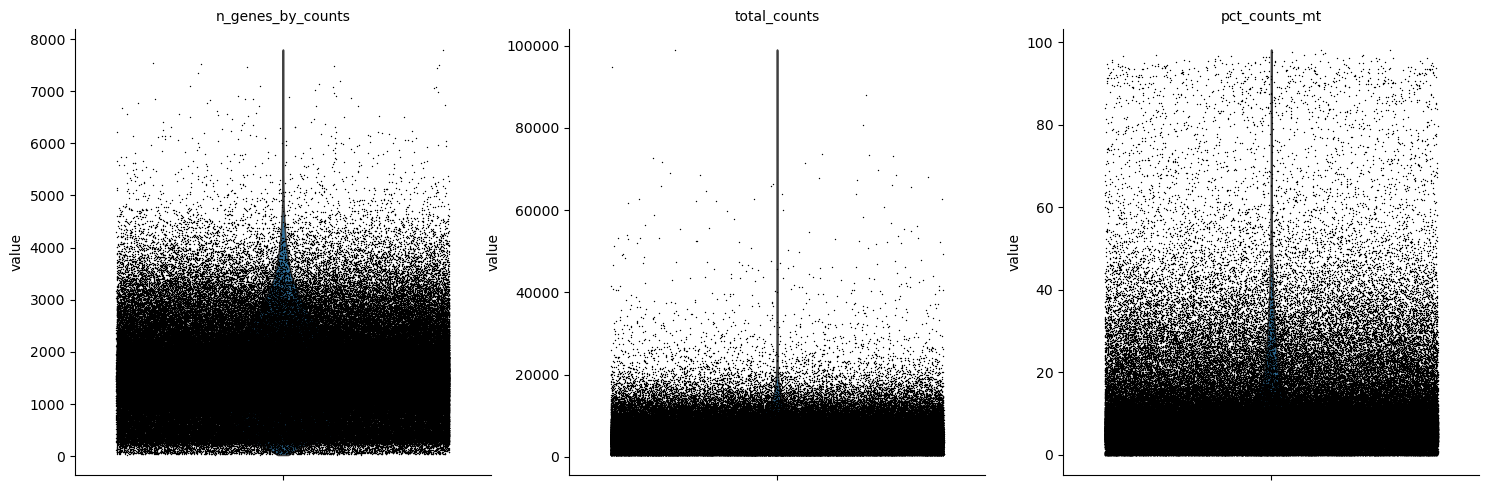

Mitochondrial Genes [Above]


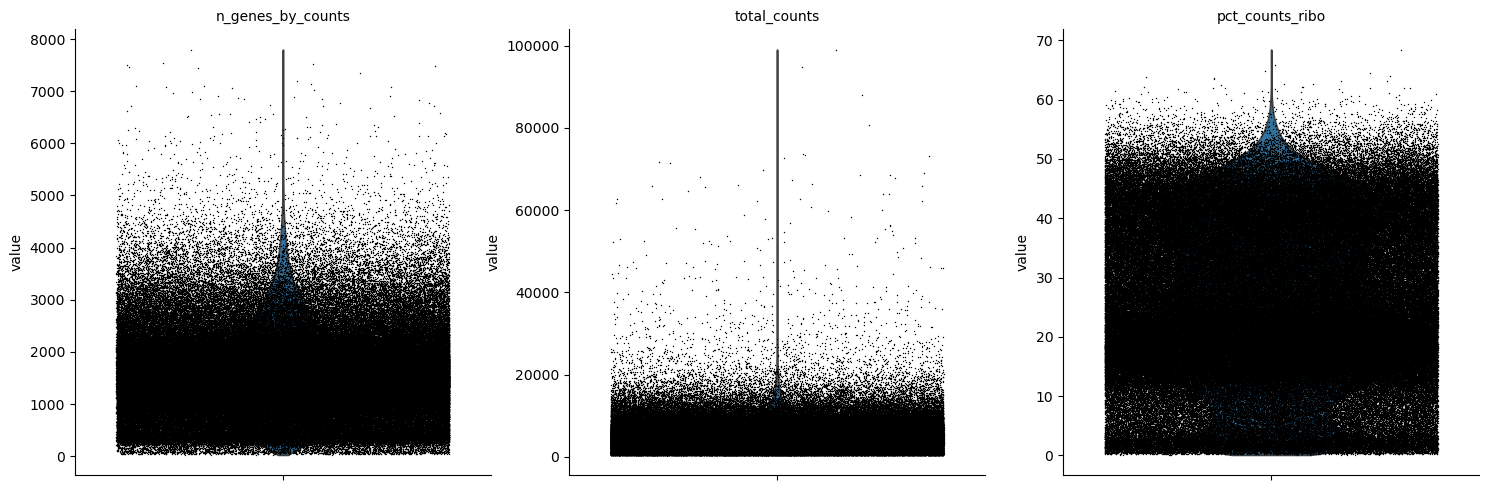

Ribosomal Genes Data [Above]


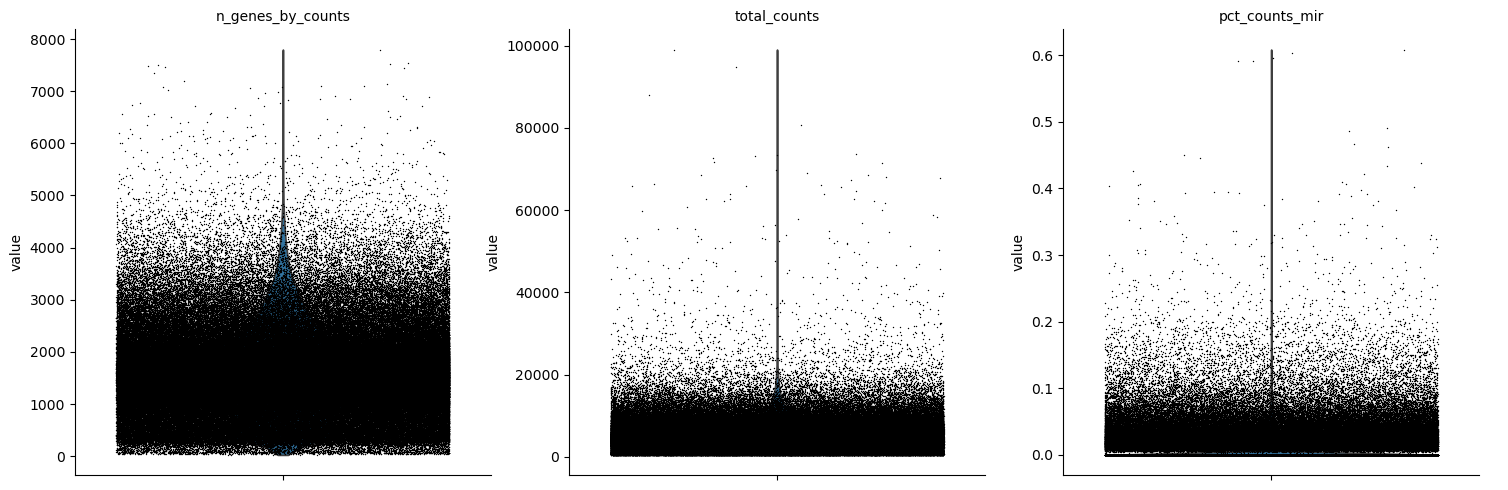

Micro-RNA Genes [Above]


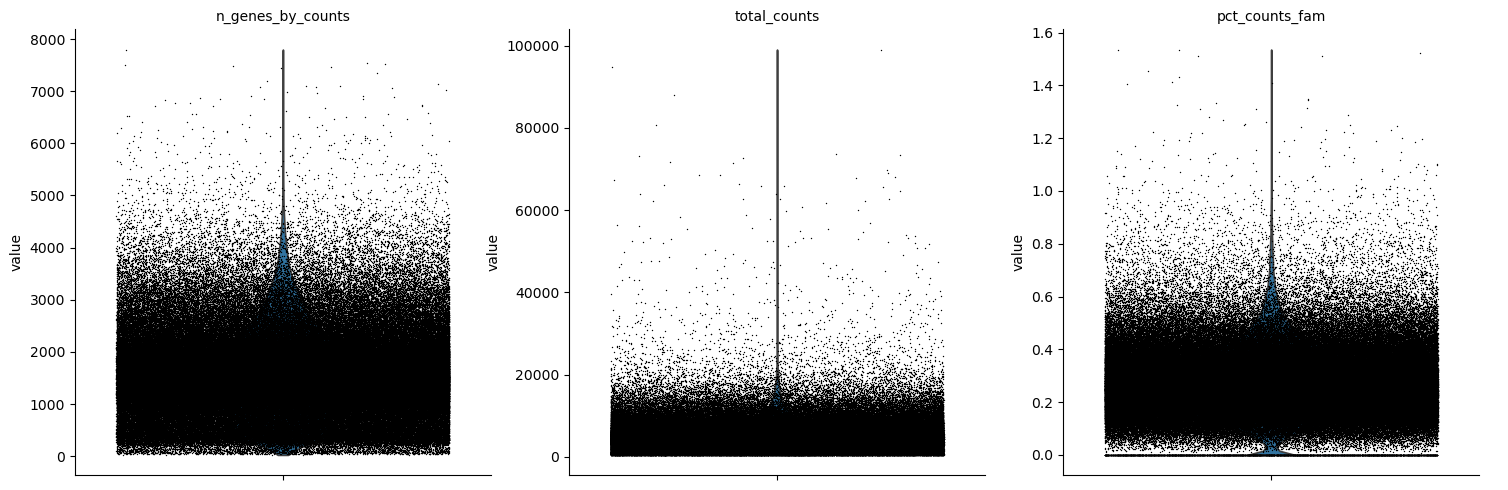

Family Similarity Genes [Above]


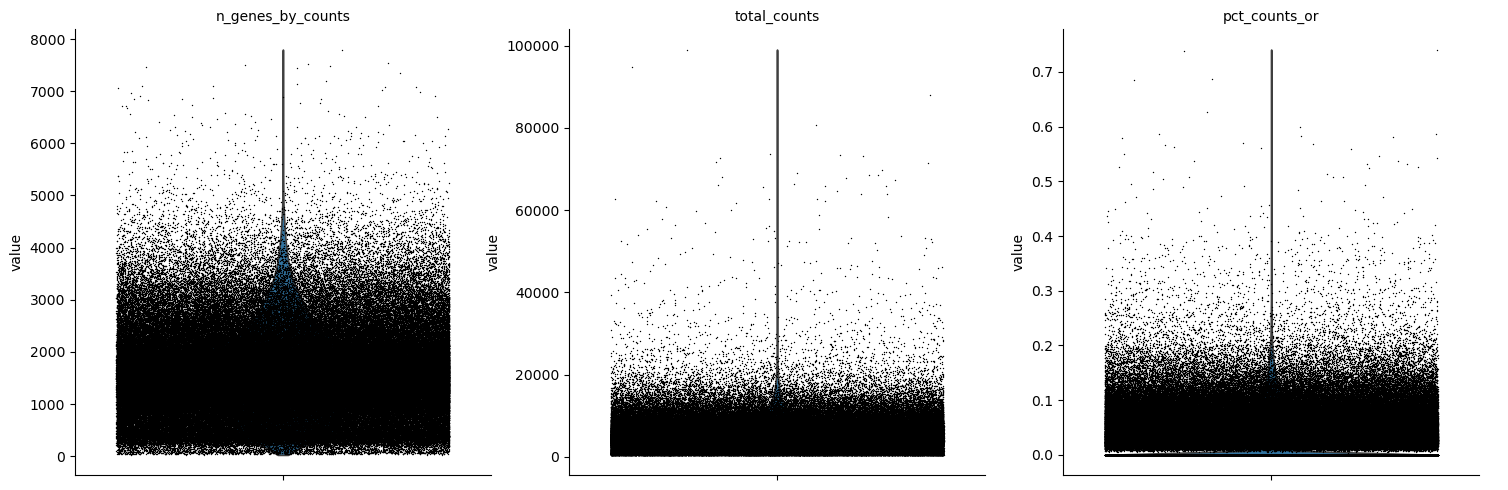

Olfactory Receptor Genes [Above]


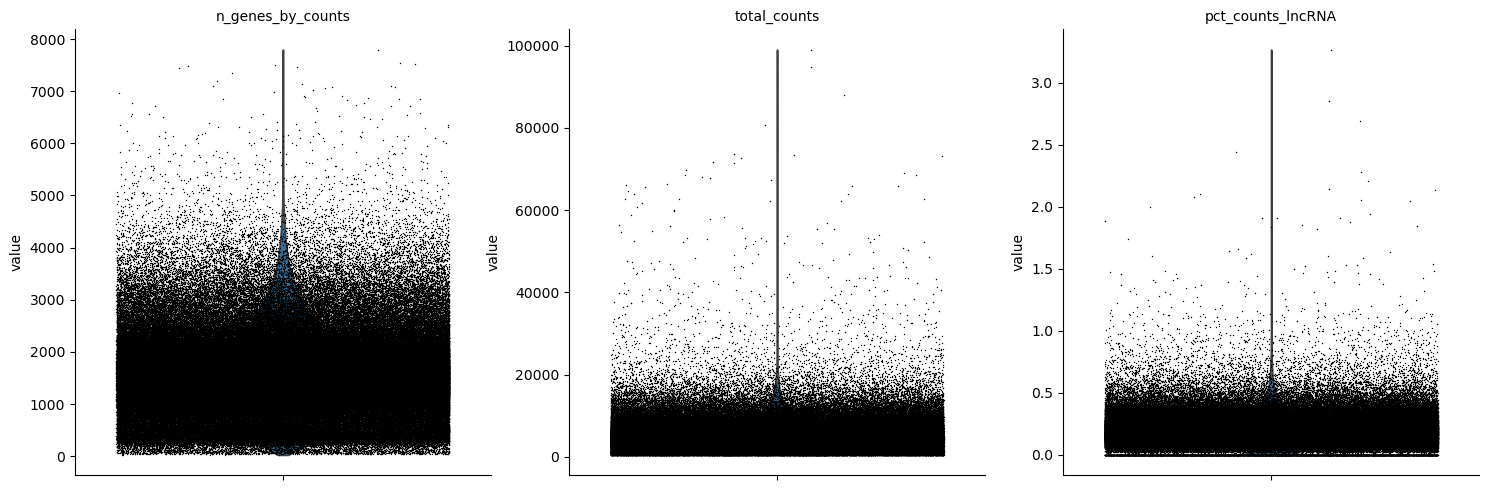

Long non-coding RNA Genes/pseudogenes [Above]


In [ ]:
# Mitochondrial gene plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
print("Mitochondrial Genes [Above]")

#ribsomal genes
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_ribo"],  # Include pct_counts_ribo here
    jitter=0.4,
    multi_panel=True
)
# Add a title to the plot
print("Ribosomal Genes Data [Above]")

# MicroRNA genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mir"], jitter=0.4, multi_panel=True)
print("Micro-RNA Genes [Above]")

# Family similarity genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_fam"], jitter=0.4, multi_panel=True)
print("Family Similarity Genes [Above]")

# Olfactory receptor genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_or"], jitter=0.4, multi_panel=True)
print("Olfactory Receptor Genes [Above]")

# Long non-coding RNA genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_lncRNA"], jitter=0.4, multi_panel=True)
print("Long non-coding RNA Genes/pseudogenes [Above]")

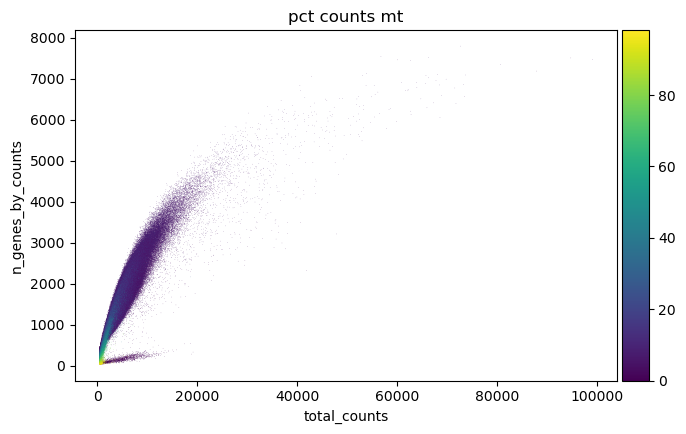

In [ ]:
#The relationship between the total RNA content and gene diversity across cells, with mitochondrial content as a third variable
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [38]:
#Filter out cells with insufficient gene expression data.
sc.pp.filter_cells(adata, min_genes=100)

#Remove genes that are too sparce (detected in <3 cells) for meaningful analysis 
sc.pp.filter_genes(adata, min_cells=3)
 

/opt/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [39]:
adata.obs["original_names"] = adata.obs_names.copy()
#Will allow for tracking of individual cells in the dataset
adata.obs_names_make_unique()


In [40]:
#show AnnData object summary after filtering 
adata

AnnData object with n_obs × n_vars = 307618 × 25303
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_mir', 'log1p_total_counts_mir', 'pct_counts_mir', 'total_counts_fam', 'log1p_total_counts_fam', 'pct_counts_fam', 'total_counts_or', 'log1p_total_counts_or', 'pct_counts_or', 'total_counts_lncRNA', 'log1p_total_counts_lncRNA', 'pct_counts_lncRNA', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'original_names'
    var: 'gene_symbols', 'mt', 'mir', 'fam', 'or', 'lncRNA', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo', 'n_cells'

In [42]:
#Randomly subsample 10% of the cells in adata
sc.pp.subsample(adata, fraction=0.1, copy=False)

#Scrublet algorithm to identify potential doublets, based on sample_id
sc.pp.scrublet(adata, batch_key="sample_id")


In [ ]:
#For later reference:
# Retain unprocessed data by saving a copy of the raw expression matrix (adata.X) in a new layer called counts
adata.layers["counts"] = adata.X.copy()